In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
sns.set_style("dark")

In [2]:
input_data = pd.read_csv('bank_data_for_credit_card_prediction.csv')

In [3]:
input_data.head()

Acct_Frequency  Acct_YearOpened  Client_District_ID Loan_Status Client_Age  \
0             MI             1995                  18           N          M   
1             MI             1993                   1           A          S   
2             MI             1997                   5           N          M   
3             MI             1996                  12           N          S   
4             MI             1997                  15           N          S   

  Disp_Add_Users Client_Sex  Trans_Avg_Balance Card_Type  Is_Card_Holder  
0              N          F           15994.01      none               0  
1              Y          M           36540.70      none               0  
2              Y          M           26973.51      none               0  
3              N          M           21753.45      none               0  
4              N          M           25090.07      none               0

In [4]:
input_data.columns

Index([u'Acct_Frequency', u'Acct_YearOpened', u'Client_District_ID',
       u'Loan_Status', u'Client_Age', u'Disp_Add_Users', u'Client_Sex',
       u'Trans_Avg_Balance', u'Card_Type', u'Is_Card_Holder'],
      dtype='object')

Count of card holders for each type
none       3608
classic     659
junior      145
gold         88
Name: Card_Type, dtype: int64


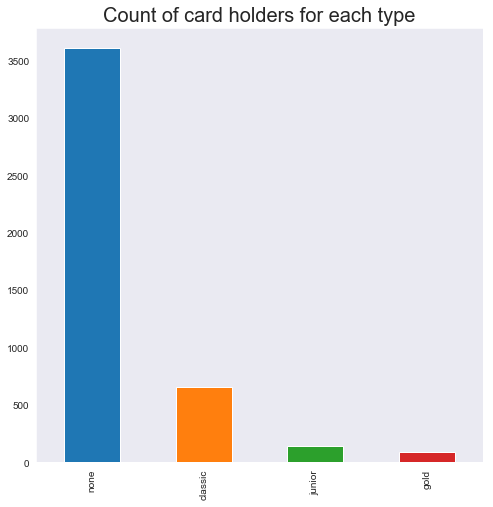

In [5]:
print('Count of card holders for each type')
print(input_data.Card_Type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
input_data.Card_Type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
ax.set_title('Count of card holders for each type', size = 20)
plt.show()

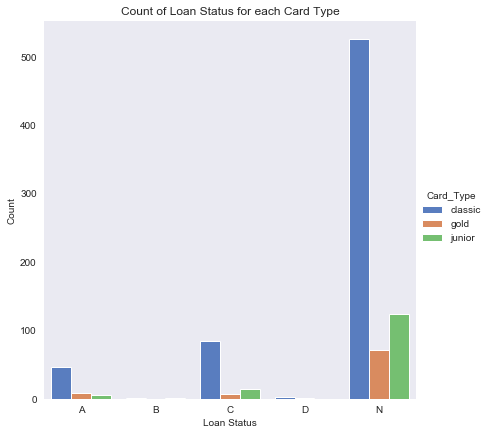

In [6]:
#Count of Loan Status for each Card Type
card_type_loan_status_df = input_data.groupby(['Card_Type', 'Loan_Status']).size()
card_type_loan_status_df = card_type_loan_status_df.to_frame()
card_type_loan_status_df.reset_index(inplace=True)
card_type_loan_status_df = card_type_loan_status_df[(card_type_loan_status_df.Card_Type != 'none')]
card_type_loan_status_df.columns = ['Card_Type', 'Loan_Status', 'Count']

ax = sns.catplot(x="Loan_Status", y="Count", hue="Card_Type", data=card_type_loan_status_df,
                height=6, kind="bar", palette="muted")
plt.ticklabel_format(style='plain', axis='y')
ax.despine(left=True)
ax.set(xlabel='Loan Status', ylabel='Count', title='Count of Loan Status for each Card Type')

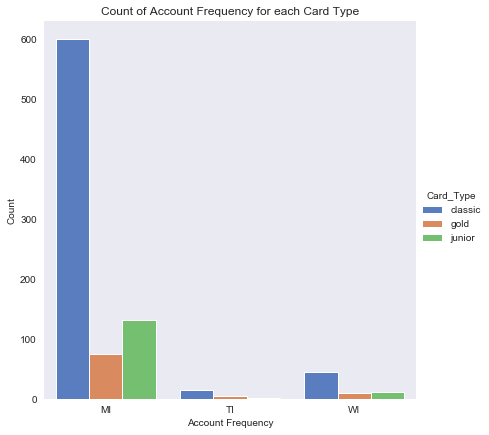

In [7]:
#Count of Account Frequency for each Card Type
account_frequency_loan_status_df = input_data.groupby(['Card_Type', 'Acct_Frequency']).size()
account_frequency_loan_status_df = account_frequency_loan_status_df.to_frame()
account_frequency_loan_status_df.reset_index(inplace=True)

account_frequency_loan_status_df = account_frequency_loan_status_df[(account_frequency_loan_status_df.Card_Type != 'none')]
account_frequency_loan_status_df.columns = ['Card_Type', 'Acct_Frequency', 'Count']

ax = sns.catplot(x="Acct_Frequency", y="Count", hue="Card_Type", data=account_frequency_loan_status_df,
                height=6, kind="bar", palette="muted")
plt.ticklabel_format(style='plain', axis='y')
ax.despine(left=True)
ax.set(xlabel='Account Frequency', ylabel='Count', title='Count of Account Frequency for each Card Type')

[Text(0,0.5,'Card Type'),
 Text(0.5,0,'Transaction Amount'),
 Text(0.5,1,'Transction Amounts for each Card Type')]

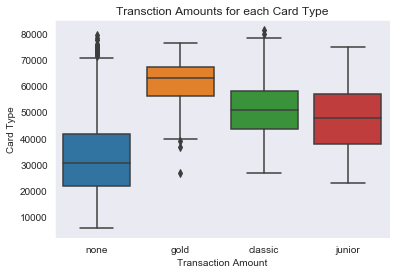

In [8]:
#Transction Amounts for each Card Type
amount_card_type = input_data[['Card_Type', 'Trans_Avg_Balance']]
#amount_card_type = amount_card_type[(amount_card_type.Card_Type !='none')]
ax = sns.boxplot(x='Card_Type', y='Trans_Avg_Balance', data=amount_card_type)
ax.set(xlabel='Transaction Amount', ylabel='Card Type', title='Transction Amounts for each Card Type')